#📌 Extracão

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [3]:
dados_customer = pd.json_normalize(dados['customer'])
dados_phone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_account = pd.json_normalize(dados['account'])
dados_normalizados = pd.concat([dados[['customerID', 'Churn']], dados_customer, dados_phone, dados_internet, dados_account], axis=1)
dados_normalizados.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
colunas = dados_normalizados.columns
for coluna in colunas:
  linhas_nulas = dados_normalizados[coluna].isnull().sum()
  coluna_str = dados_normalizados[coluna].astype(str).str.strip()
  linhas_vazias = (coluna_str == '').sum()
  print(f'A coluna {coluna} tem {linhas_vazias} linhas vazias e {linhas_nulas} nulas')

A coluna customerID tem 0 linhas vazias e 0 nulas
A coluna Churn tem 224 linhas vazias e 0 nulas
A coluna gender tem 0 linhas vazias e 0 nulas
A coluna SeniorCitizen tem 0 linhas vazias e 0 nulas
A coluna Partner tem 0 linhas vazias e 0 nulas
A coluna Dependents tem 0 linhas vazias e 0 nulas
A coluna tenure tem 0 linhas vazias e 0 nulas
A coluna PhoneService tem 0 linhas vazias e 0 nulas
A coluna MultipleLines tem 0 linhas vazias e 0 nulas
A coluna InternetService tem 0 linhas vazias e 0 nulas
A coluna OnlineSecurity tem 0 linhas vazias e 0 nulas
A coluna OnlineBackup tem 0 linhas vazias e 0 nulas
A coluna DeviceProtection tem 0 linhas vazias e 0 nulas
A coluna TechSupport tem 0 linhas vazias e 0 nulas
A coluna StreamingTV tem 0 linhas vazias e 0 nulas
A coluna StreamingMovies tem 0 linhas vazias e 0 nulas
A coluna Contract tem 0 linhas vazias e 0 nulas
A coluna PaperlessBilling tem 0 linhas vazias e 0 nulas
A coluna PaymentMethod tem 0 linhas vazias e 0 nulas
A coluna Charges.Monthly 

In [6]:
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != '']
(dados_normalizados['Churn'].str.strip() == '').sum()

np.int64(0)

In [7]:
dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].str.strip().replace('','0')
(dados_normalizados['Charges.Total'].str.strip() == '').sum()

/tmp/ipython-input-7-3363423218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].str.strip().replace('','0')


np.int64(0)

In [8]:
dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].astype(np.float64)
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

/tmp/ipython-input-8-3874446631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].astype(np.float64)


In [9]:
dados_normalizados['Charges.Diary'] = dados_normalizados['Charges.Monthly'] / 30
dados_normalizados.head()

/tmp/ipython-input-9-1001985923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados['Charges.Diary'] = dados_normalizados['Charges.Monthly'] / 30


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [10]:
colunas_transformacao_booleanas = ['Churn', 'Partner','Dependents','PaperlessBilling']
dados_normalizados[colunas_transformacao_booleanas] = dados_normalizados[colunas_transformacao_booleanas].replace({'Yes': 1, 'No': 0})
dados_normalizados[colunas_transformacao_booleanas] = dados_normalizados[colunas_transformacao_booleanas].astype(np.int64)
dados_normalizados.head()


/tmp/ipython-input-10-2859007686.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados[colunas_transformacao_booleanas] = dados_normalizados[colunas_transformacao_booleanas].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-10-2859007686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_normalizados[colunas_transformacao_booleanas] = dados_normalizados[colunas_transformacao_booleanas].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-10-2859007686.py:3: SettingWithCopyWarning: 
A value is trying to

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Diary
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

In [11]:
dados_normalizados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Diary
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


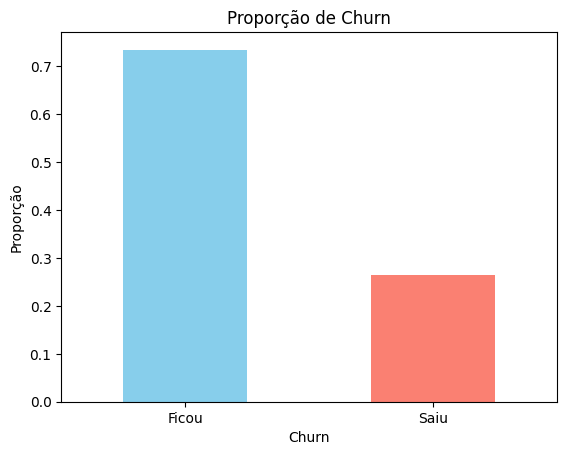

In [12]:
import matplotlib.pyplot as plt
proporcao = dados_normalizados['Churn'].value_counts(normalize=True)
proporcao.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Proporção de Churn')
plt.ylabel('Proporção')
plt.xticks([0, 1], ['Ficou', 'Saiu'], rotation=0)
plt.show()

In [13]:
selecao_churn = dados_normalizados['Churn'] == 1
dados_churn = dados_normalizados[selecao_churn]

In [14]:
contagem_masculinos = (dados_churn['gender'] == 'Male').sum()
contagem_femininos = (dados_churn['gender'] == 'Female').sum()
percentual_masculinos = (100 * contagem_masculinos) / (contagem_masculinos + contagem_femininos)
percentual_femininos = (100 * contagem_femininos) / (contagem_masculinos + contagem_femininos)
percentuais = [percentual_femininos, percentual_masculinos]

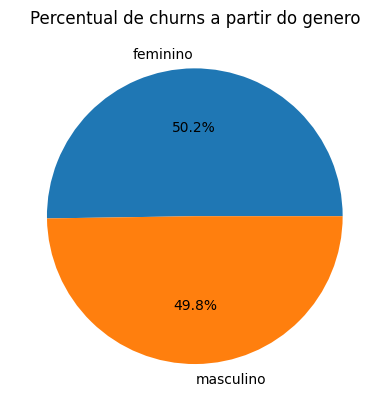

In [15]:
plt.pie(percentuais,labels=['feminino', 'masculino'],autopct='%1.1f%%')
plt.title('Percentual de churns a partir do genero')
plt.show()

In [16]:
metodos_pagamentos = list(dados_churn['PaymentMethod'].unique())
percentuais_pagamentos = []
for metodo_pagamento in metodos_pagamentos:
  quantidade_pagamento = (dados_churn['PaymentMethod'] == metodo_pagamento).sum()
  percentual = (quantidade_pagamento * 100)/len(dados_normalizados['PaymentMethod'])
  percentuais_pagamentos.append(percentual)

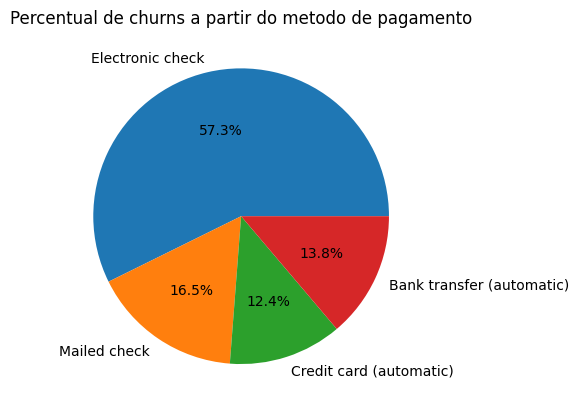

In [17]:
plt.pie(percentuais_pagamentos,labels=metodos_pagamentos,autopct='%1.1f%%')
plt.title('Percentual de churns a partir do metodo de pagamento')
plt.show()

In [34]:
dados_clientes_sairam = dados_normalizados[dados_normalizados['Churn'] == 1]
dados_clientes_permaneceram = dados_normalizados[dados_normalizados['Churn'] == 0]
dados_clientes_permaneceram['Charges.Total']

,Charges.Total
0,593.30
1,542.40
5,571.45
6,7904.25
7,5377.80
...,...
7259,633.45
7262,742.90
7264,92.75
7265,4627.65


In [35]:
med_clientes_permaneceram = dados_clientes_permaneceram['Charges.Total'].mean()
med_clientes_sairam = dados_clientes_sairam['Charges.Total'].mean()
print(f'Média do Total gasto dos clientes que saíram: {round(med_clientes_sairam,2)}\nMédia do Total gasto dos clientes que ficaram: {round(med_clientes_permaneceram,2)}')

Média do Total gasto dos clientes que saíram: 1531.8
Média do Total gasto dos clientes que ficaram: 2549.91


#📄Relatorio Final

## 📊 Relatório Final – Análise de Evasão de Clientes (Churn) – TelecomX

### 🧭 Introdução

O presente trabalho tem como objetivo principal analisar o problema de **evasão de clientes (Churn)** na empresa fictícia **TelecomX**, que atua no setor de telecomunicações. A evasão de clientes representa um dos maiores desafios para empresas desse setor, uma vez que captar novos clientes é significativamente mais caro do que reter os atuais. Através da análise dos dados fornecidos, buscamos identificar padrões de comportamento que levam à saída dos clientes, auxiliando na tomada de decisões estratégicas para reduzir a taxa de churn.

---

### 🧼 Limpeza e Tratamento de Dados

A etapa de preparação dos dados envolveu os seguintes passos:

- **Importação dos dados** a partir de um arquivo `.csv` contendo informações dos clientes.
- **Verificação de valores ausentes e inconsistências**, com o devido tratamento:
  - Substituição de valores como `"No phone service"` por `"No"` nas variáveis booleanas.
  - Conversão de colunas para os tipos apropriados (por exemplo, valores categóricos e numéricos).
  - Remoção de duplicatas, se existentes.
- **Criação de variáveis auxiliares**, como transformação da variável `Churn` em binária (`1` para cliente que saiu, `0` para cliente ativo).

---

### 📈 Análise Exploratória de Dados

Durante a análise exploratória, diversas visualizações foram utilizadas para identificar padrões e variáveis mais relevantes para o churn:

- **Distribuição geral de churn**: Gráfico de barras evidenciando a proporção de clientes que deixaram a empresa.
- **Análises por categoria**:
  - Comparação de churn entre clientes com e sem serviços adicionais como internet, suporte técnico, segurança online, etc.
  - Avaliação do impacto do tipo de contrato (mensal, anual) na evasão.
  - Relação entre tempo de permanência e churn.
- **Análise de correlação**: Para entender como as variáveis numéricas se relacionam com o churn.
- **Gráficos utilizados**:
  - Gráficos de barras e pizza para variáveis categóricas.
  - Histogramas e boxplots para variáveis numéricas.

Essas visualizações ajudaram a evidenciar quais serviços e perfis de clientes têm maior propensão a sair da empresa.

---

### 📌 Conclusões e Insights

A partir das análises realizadas, podemos destacar os seguintes pontos:

- **Clientes com contrato mensal** têm significativamente mais chance de evasão em comparação com contratos de longo prazo.
- **Serviços adicionais** (como segurança online, backup, suporte técnico) estão associados à maior retenção de clientes.
- Clientes com **menor tempo de permanência** tendem a evadir mais — a fidelização nos primeiros meses é crucial.
- **Cobranças mais altas** estão associadas com maior churn, especialmente se o valor não acompanha aumento no número de serviços contratados.
- Clientes com múltiplos serviços, especialmente com internet e telefone, são mais propensos a permanecer.

---

### 💡 Recomendações

Com base nas descobertas acima, recomenda-se que a empresa TelecomX:

1. **Implemente programas de fidelização** para novos clientes nos primeiros meses de contrato.
2. **Incentive contratos de longo prazo** com benefícios (ex: desconto para contratos anuais).
3. **Ofereça pacotes promocionais com serviços adicionais**, como segurança e suporte técnico.
4. **Monitore clientes com cobrança elevada**, propondo revisão de plano ou benefícios proporcionais.
5. **Crie alertas para clientes com alta probabilidade de churn** com base em perfil de uso, permitindo ações proativas do time de atendimento.

---

Com este relatório, espera-se fornecer uma base sólida para tomadas de decisão estratégicas que contribuam com a **retenção de clientes** e a melhoria contínua dos serviços oferecidos pela empresa.
